# Computationnal Statistics : Homework 1

## Reminder on Markov Chain - Stochastic gradient descent

### Exercise 1 : Box-Muller and Marsaglia-Bray algorithm

See handwritten homework.

### Exercise 3 : Stochastic Gradient Learning in Neural networks

#### 1. Describe the stochastic gradient descent and implement it.

It is a variant of the original gradient descent, which is sometimes too costly to use, for example when computing the gradient at each step of the descent is computationnaly too intensive. The stochastic gradient "randomly" chooses, at each step of the descent, a datapoint with which computing the gradient. Because we want the expectation of the sum pf those intermediate gradients to tend to the real value of the gradient, the distribution associated to the random choice of a datapoint can be choosen uniform among the datapoints.

In [162]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Here we implement a stochastic gradient descent for linear regression. 

In [163]:
import numpy as np
import random
from matplotlib import pyplot as plt
import pandas as pd

epsilon = 0.1

random.seed(1)

def grad(x, y, w):

    #print(x, y, w)

    return(-2 * (y - np.dot(w, x)) * x)

def stochastic_gradient(x , y , n_iter):

    w = np.zeros(x.shape[1])

    for i in range(n_iter): # stopping criterion ?

        k = random.randrange(x.shape[0])
        x_k = x[k]
        y_k = y[k]
        w = w + epsilon * grad(x_k, y_k, w)
        w = w 
        #print(w)

    return(w)

#### 2. and 3. Sample a set of observations and test the algorithm. What is w* estimated ? Is it far from real w ?

Here we test our algorithm for some randomly generated datapoints. 

w* :  [ -3.42332217e+183  -3.89469446e+183]


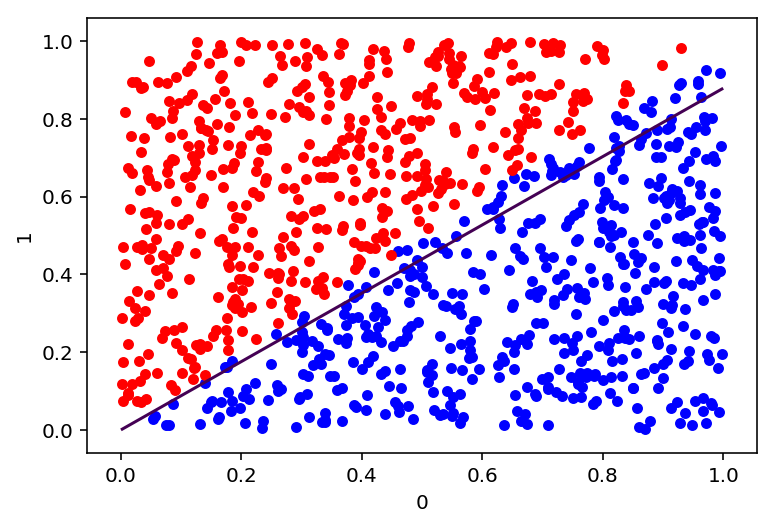

In [297]:
x1 = np.random.rand(1000)
x2 = np.random.rand(1000)

y = np.zeros(x1.shape[0])

for i in range(x1.shape[0]):
    if x1[i] - x2[i] > 0:
        y[i] = 1
    else:
        y[i] = -1
        
data = pd.DataFrame([x1, x2]).T
data['y'] = y

ones = data.loc[data['y'] == 1]
ones = ones.drop('y', axis = 1)
opp = data.loc[data['y'] == -1]
opp = opp.drop('y', axis = 1)

plot_1 = ones.plot(kind = 'scatter', x = 0, y = 1, color = 'blue')
opp.plot(kind = 'scatter', x = 0, y = 1, color = 'red', ax = plot_1)

w = stochastic_gradient(np.array(data.drop('y', axis = 1)), np.array(data.drop([0,1], axis =1)), 4000)

print('w* : ', w)

y1 = np.linspace(0, 1)
y2 = np.linspace(0, 1)[:, None]

plt.contour(y1, y2.ravel(), y1 * w[0] - y2 * w[1], [0])
plt.show()

w* is w estimated via the stochastic gradient descent method. It is graphically not far from the real w - which could be showed for example by computing the classification error - and could be closer by increasing the number of iterations.

#### 4. Noise with an additive Gaussian noise and perform the optimisation again. Compare your results.

Now let us add some gaussian random noise to the data.

w* : [ -1.66331377e+183  -2.16690035e+183]


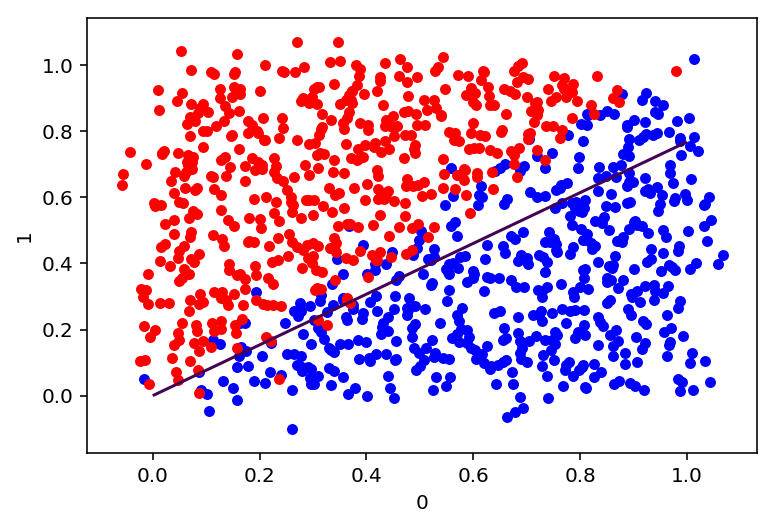

In [299]:
noise1 = np.random.normal(0,0.05,1000)
noise2 = np.random.normal(0,0.05,1000)

# 0 is the mean of the normal distribution you are choosing from
# 1 is the standard deviation of the normal distribution
# 100 is the number of elements you get in array noise

x1_g = np.add(x1, noise1)
x2_g = np.add(x2, noise2)

data_g = pd.DataFrame([x1_g, x2_g]).T
data_g['y'] = y

ones_g = data_g.loc[data['y'] == 1]
ones_g = ones_g.drop('y', axis = 1)
opp_g = data_g.loc[data['y'] == -1]
opp_g = opp_g.drop('y', axis = 1)
plot_g = ones_g.plot(kind = 'scatter', x = 0, y = 1, color = 'blue')
opp_g.plot(kind = 'scatter', x = 0, y = 1, color = 'red', ax = plot_g)

w_g = stochastic_gradient(np.array(data_g.drop('y', axis = 1)), np.array(data_g.drop([0,1], axis =1)), 4000)

print('w* :', w_g)
y1 = np.linspace(0, 1)
y2 = np.linspace(0, 1)[:, None]

plt.contour(y1, y2.ravel(), y1 * w_g[0] - y2 * w_g[1], [0])
plt.show()



In spite of the gaussian random noise, the linear regression via SGD does good since w* is not far from the real w : once again we minimize the risk wich cannot be equal to zero here since the data is not separable anymore.

#### 5. Test the algorithm on the Breast Cancer Wisconsin Data Set.

Now let us test our algorithm on the Breast Cancer Wisconsin Data Set. We normalize the data and add a column of ones in order to compute the y-intercept. Then, we build a train set and a test test because we want to evaluate our results later on.

In [292]:
from sklearn.model_selection import train_test_split

data_w = pd.read_csv('/Users/gregoire/PycharmProjects/comput_stat_HWK1/breast-cancer-wisconsin.data.txt', sep=",", header=None)

labels = data_w[10] - 3
data_w = data_w.drop([0,6,10], axis = 1)
data_w = (data_w - data_w.mean())/data_w.std()
data_w['ord'] = np.ones(data_w.shape[0])
data_w['label'] = labels

x_train, x_test, y_train, y_test = train_test_split(np.array(data_w.drop(['label'], axis = 1)), np.array(data_w.drop([1,2,3,4,5,7,8,9, 'ord'], axis = 1)))

w_w = stochastic_gradient(x_train, y_train, 700)
print( 'w :', w_w)

## train_test error

w : [ -1.03114113e+174  -7.56116381e+173  -5.76223377e+173  -3.69983308e+173
  -4.50684029e+173  -5.49975915e+173  -4.63676053e+173  -4.82317837e+173
   3.12354911e+173]


Now let us perform an evaluation of the results. We predict the class of a datapoint by looking at the sign of the dot product of w and x. Increasing the number of iterations naturaly makes the classification error lower.

In [294]:
prediction = np.zeros(x_test.shape[0])

for i in range(x_test.shape[0]):
    prediction[i] = - np.sign(np.dot(w_w, x_test[i]))

classif_err = np.subtract(y_test.reshape((175,)), prediction)
print('classification error :', np.sum(classif_err))

classification error : -4.0
